<a href="https://colab.research.google.com/github/stevenlu870120/E-commerce_shipping/blob/main/E_commerce_shipping_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Shipping Dataset**
Source: 

https://www.kaggle.com/kukuroo3/ecommerce-shipping-data-competition-form?select=X_train.csv
https://www.kaggle.com/kukuroo3/ecommerce-shipping-data-competition-form?select=y_train.csv 

## **Context**
An international e-commerce company wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.


## **Content**
The dataset used for model building contained 6598 observations of 12 variables.
The data contains the following information:



*   **ID**: ID Number of Customers.
*   **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
*   **Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.
*   **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
*   **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
*   **Cost of the product**: Cost of the Product in US Dollars.
*   **Prior purchases**: The Number of Prior Purchase.
*   **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
*   **Gender**: Male and Female.
*   **Discount offered**: Discount offered on that specific product.
*   **Weight in gms**: It is the weight in grams.
*   **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# **Business Problem**

Using combined information of customers and products to identify whether product shipments are likely to be delivered on time or not for an international e-commerce company that sells electronic products.

# **Metrics**

*   AUC is defined as our primary aggregate metric for this problem because we are mainly concerned about  how well the classifier separates the on-time and not-on-time categories. 
*   Accuracy is also considered to assess the overall percentage of error. 
*   Confusion matrix is presented as a direct observation of classification performance. 


# **BLUF**

*   Top classifiers ranked by AUC:

|**Classifier** |    AUC    |       Accuracy      | Confusion Matrix |
|:----------------------|:------------:|:--------------:|:--------------:|
|Auto-Sklearn  | 0.718 | 0.693 | $$\begin{bmatrix} 452 & 80 \\ 325 & 462\\\end{bmatrix}$$ |
|Random Forest | 0.714 | 0.694 | $$\begin{bmatrix} 432 & 100 \\ 303 & 484\\\end{bmatrix}$$ |
|TPOT | 0.691 | 0.682 | $$\begin{bmatrix} 394 & 138 \\ 282 & 505\\\end{bmatrix}$$ |

*   The Random Forest Classifier outperforms all other basic and ensemble learners and reaches the AUC of 0.714 and the Accuracy of 0.694 after hyperparameter tuning. 
*   Discounts offered on the product, the weight of the product, the cost of the product, are the three most important features in our prediction model.
*   The Auto-ML model built by Auto-Sklearn reaches an AUC of 0.718 and Accuracy of 0.693, giving a slight improvement on AUC compared to our manually built Random Forest Classifier.
*   The overall prediction performance on the test data is not that satisfying, mainly due to the large number of false negative misclassifications as can be told by the confusion matrix.
*   The insufficient feature engineering of current predictors may give rise to the weak performance. The relationship among predictors can be further discovered based on current efforts.
*   More dimensions of data like weather condition, express company, purchase time (to reflect whether it’s purchased near festivals like Black Friday, Christmas) can be collected to provide more explanatory power to the target and improve model performance.




# **Library**

In [ ]:
!sudo apt-get update
!sudo apt-get install build-essential swig
!sudo apt-get upgrade
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

import autosklearn.classification

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
import plotly.express as px

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [ ]:
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# XGBoost
from xgboost import XGBClassifier

In [ ]:
# LightGBM
#!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
# scikitplot
!pip install scikit-plot
import scikitplot as skplt

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 8.0 MB/s 


In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

     |████████████████████████████████| 34.0 MB 173 kB/s 
     |████████████████████████████████| 13.1 MB 47.2 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=0b96c8b74b8dcb6406d2085a0b7f864f358c9f87ab74f085a8511d62ce3d1880
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     |████████████████████████████████| 275 kB 8.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9906e3fdb5c003bade9d7c4cb2ebc2344f688eb53dd576383740b1590c6d7952
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


#**Read Data**

In [ ]:
# Read Data
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read 
# Source of data: https://www.kaggle.com/prachi13/customer-analytics
file_X = "drive/My Drive/Colab Notebooks/BDML/WOW/WOW_Portfolio/Commerce_Shipping_Data/X_train.csv" # /WOW_Portfolio/Commerce_Shipping_Data/X_train.csv /Colab Notebooks/BDML/WOW/WOW_Portfolio/Commerce_Shipping_Data/X_train.csv
file_Y = "drive/My Drive/Colab Notebooks/BDML/WOW/WOW_Portfolio/Commerce_Shipping_Data/y_train.csv"   # /WOW_Portfolio/Commerce_Shipping_Data/y_train.csv /Colab Notebooks/BDML/WOW/WOW_Portfolio/Commerce_Shipping_Data/y_train.csv
X = pd.read_csv(file_X) # read in csv file
Y = pd.read_csv(file_Y)
df = pd.merge(X, Y, on = "ID")
df = df.drop(columns=["ID"])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA**

## **Shape & Data Types**



In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Shape of df
print("Shape:", df.shape, '\n')

# Check data types
df.info()

# Head of df
df.head()

Shape: (6598, 11) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 0 to 6597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      6598 non-null   object
 1   Mode_of_Shipment     6598 non-null   object
 2   Customer_care_calls  6598 non-null   object
 3   Customer_rating      6598 non-null   int64 
 4   Cost_of_the_Product  6598 non-null   int64 
 5   Prior_purchases      6598 non-null   int64 
 6   Product_importance   6598 non-null   object
 7   Gender               6598 non-null   object
 8   Discount_offered     6598 non-null   int64 
 9   Weight_in_gms        6598 non-null   int64 
 10  Reached.on.Time_Y.N  6598 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 618.6+ KB


Warehouse_block Mode_of_Shipment Customer_care_calls  Customer_rating  \
0               A           Flight                   4                3   
1               F             Ship                   3                1   
2               F             Road                   4                1   
3               F             Ship                   4                3   
4               A           Flight                   5                3   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  266                5               high      F   
1                  174                2                low      M   
2                  154               10               high      M   
3                  158                3             medium      F   
4                  175                3                low      M   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                 5           1590                    0  
1                44           1556                    1  
2                10           5674                    1  
3                27           1207                    1  
4                 7           4833                    1

In [ ]:
 # Check Categorical Data
print(df['Warehouse_block'].unique(),'\n',
df['Mode_of_Shipment'].unique(),'\n',
df['Customer_care_calls'].unique(),'\n',
df['Customer_rating'].unique(),'\n',
df['Prior_purchases'].unique(),'\n',
df['Product_importance'].unique(),'\n',
df['Gender'].unique())

['A' 'F' 'C' 'B' 'D'] 
 ['Flight' 'Ship' 'Road'] 
 ['4' '3' '5' '6' '2' '$7'] 
 [3 1 2 5 4] 
 [ 5  2 10  3  4  6  7  8] 
 ['high' 'low' 'medium'] 
 ['F' 'M']


In [ ]:
# Data Correction
df["Customer_care_calls"].replace({"$7": "7"}, inplace=True)
# Convert Customer_care_calls to numerical
df["Customer_care_calls"] = pd.to_numeric(df["Customer_care_calls"])

## **Detect Duplicates & Missing Values**

In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Check for missing values
print('\n\nMissing Values for df\n',df.isnull().sum(axis=0))



Missing Values for df
 Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


## **Check Target Balance**

In [ ]:
df['Reached.on.Time_Y.N'].describe()

count    6598.000000
mean        0.596696
std         0.490598
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64

## **Univariate Numerical Descriptive Statistics**

In [ ]:
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)

UNIVARIATE DESCRIPTIVE STAT using pandas
                       count unique   top  freq         mean          std  \
Warehouse_block        6598      5     F  2262          NaN          NaN   
Mode_of_Shipment       6598      3  Ship  4512          NaN          NaN   
Customer_care_calls  6598.0    NaN   NaN   NaN     4.051985     1.149251   
Customer_rating      6598.0    NaN   NaN   NaN     2.991361     1.409624   
Cost_of_the_Product  6598.0    NaN   NaN   NaN   210.393149    48.258089   
Prior_purchases      6598.0    NaN   NaN   NaN     3.577751     1.511394   
Product_importance     6598      3   low  3162          NaN          NaN   
Gender                 6598      2     F  3311          NaN          NaN   
Discount_offered     6598.0    NaN   NaN   NaN    13.353592    16.187267   
Weight_in_gms        6598.0    NaN   NaN   NaN  3604.191119  1635.697627   
Reached.on.Time_Y.N  6598.0    NaN   NaN   NaN     0.596696     0.490598   

                        min      25%     50% 

## **Skewness & Kurtosis**

In [ ]:
print("\n SKEWNESS\n",df.skew())
print("\n KURTOSIS\n",df.kurt())


 SKEWNESS
 Customer_care_calls    0.385112
Customer_rating       -0.002883
Cost_of_the_Product   -0.165466
Prior_purchases        1.664884
Discount_offered       1.820051
Weight_in_gms         -0.218728
Reached.on.Time_Y.N   -0.394316
dtype: float64

 KURTOSIS
 Customer_care_calls   -0.313869
Customer_rating       -1.287016
Cost_of_the_Product   -0.968458
Prior_purchases        4.000817
Discount_offered       2.096800
Weight_in_gms         -1.467108
Reached.on.Time_Y.N   -1.845074
dtype: float64


## **Multivariate Numerical Descriptive Statistics**

CORRELATION MATRIX
                      Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.010664   
Customer_rating                 0.010664         1.000000   
Cost_of_the_Product             0.336463         0.007704   
Prior_purchases                 0.174087         0.013940   
Discount_offered               -0.128232        -0.004975   
Weight_in_gms                  -0.272853        -0.007009   
Reached.on.Time_Y.N            -0.073576         0.013812   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Customer_care_calls             0.336463         0.174087         -0.128232   
Customer_rating                 0.007704         0.013940         -0.004975   
Cost_of_the_Product             1.000000         0.127362         -0.147798   
Prior_purchases                 0.127362         1.000000         -0.093055   
Discount_offered               -0.147798        -0.093055          1.000000   
Weight_in_gms    

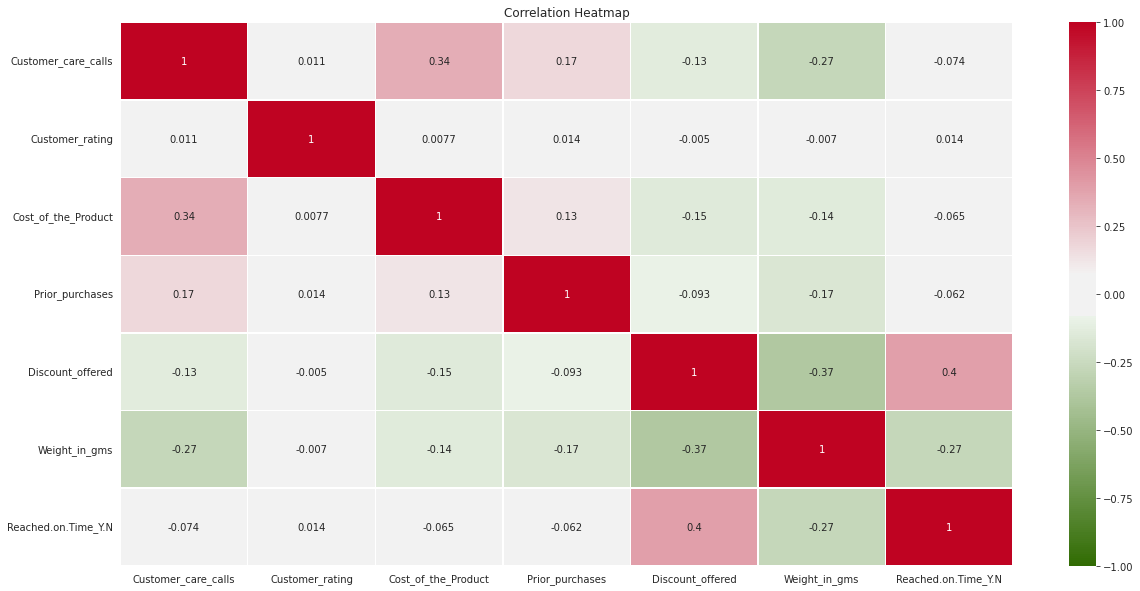

Weight_in_gms         -0.271201
Customer_care_calls   -0.073576
Cost_of_the_Product   -0.065485
Prior_purchases       -0.061862
Customer_rating        0.013812
Discount_offered       0.395611
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64


In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")
plt.show()

#Calculate the sorted correlation of the Reached_on_Time column
print(df.corr()['Reached.on.Time_Y.N'].sort_values())

## **Univariate Graphical Descriptive Statistics**

### **Discount_offered**

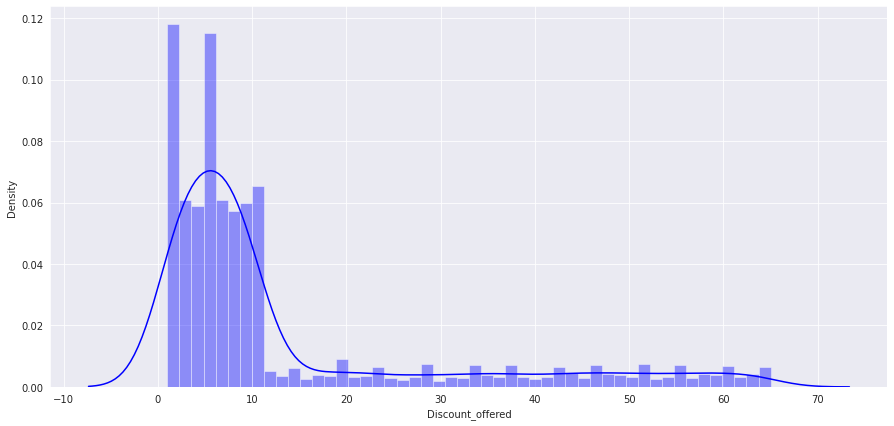

In [ ]:
# Distribution of Discount_offered
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'b')
plt.show()

In [ ]:
# Boxplot of Discount_offered regarding Reached_on_Time
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### **Weight_in_gms**

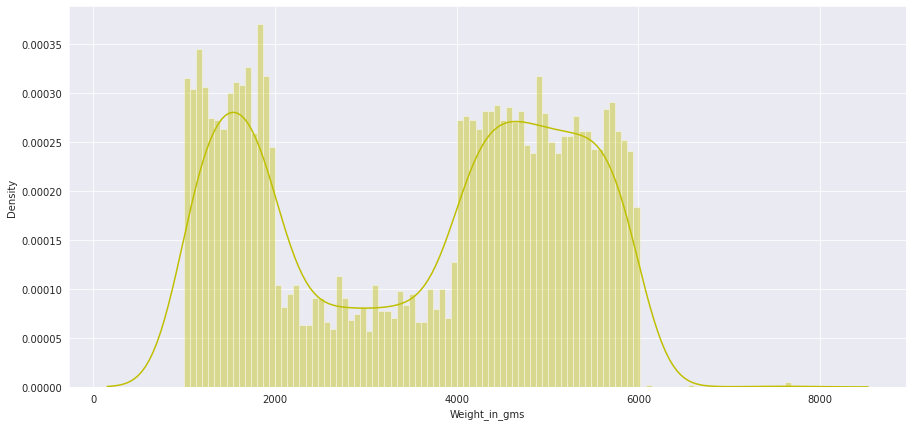

In [ ]:
# Distribution of Weight_in_gms
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Weight_in_gms'], bins = 100, color = 'y')
plt.show()

In [ ]:
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### **Categorical Data**

In [ ]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender']
target_col = 'Reached.on.Time_Y.N'

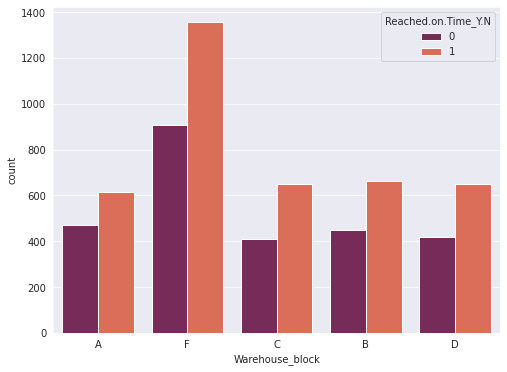

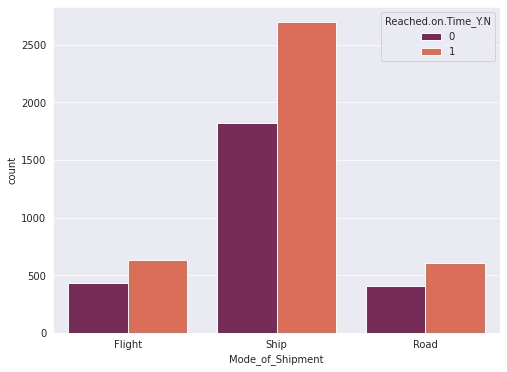

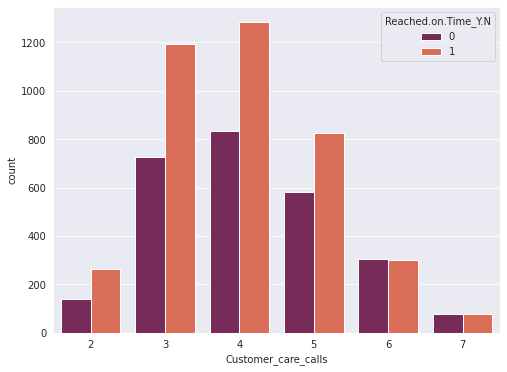

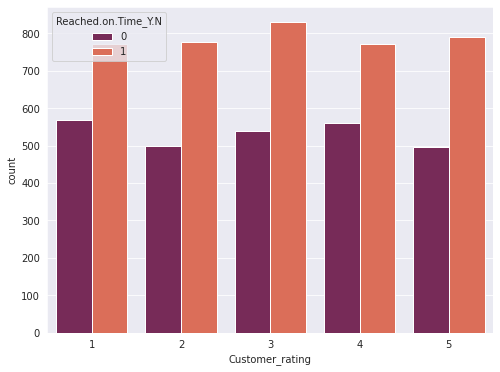

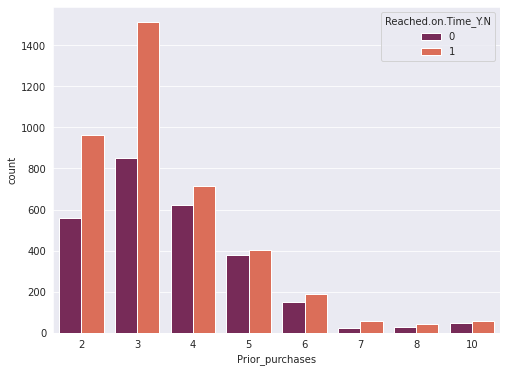

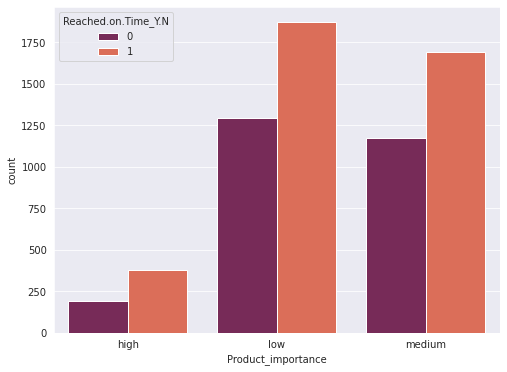

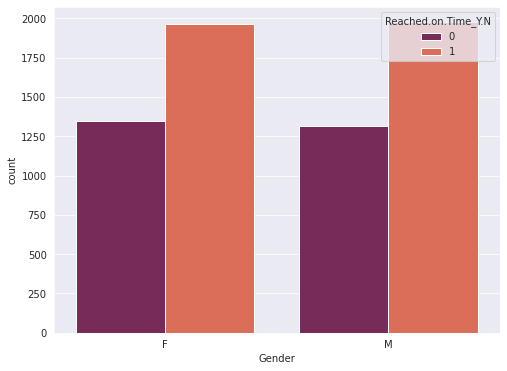

In [ ]:
for col in categorical_cols:
    df_count = df[col].value_counts().reset_index()
    df_count.columns = [col, 'value_counts']
    fig = px.pie(df_count, names = col, values = 'value_counts',
                color_discrete_sequence = px.colors.sequential.matter_r, 
                width = 650, height = 400, hole = 0.5, title=col)
    fig.update_traces(textinfo = 'percent+label') # value+label
    fig.show()
    plt.figure(figsize = (8, 6))
    sns.countplot(col, hue = 'Reached.on.Time_Y.N', data = df, palette='rocket')
    plt.show()

## **Multivariate Graphical Descriptive Statistics**

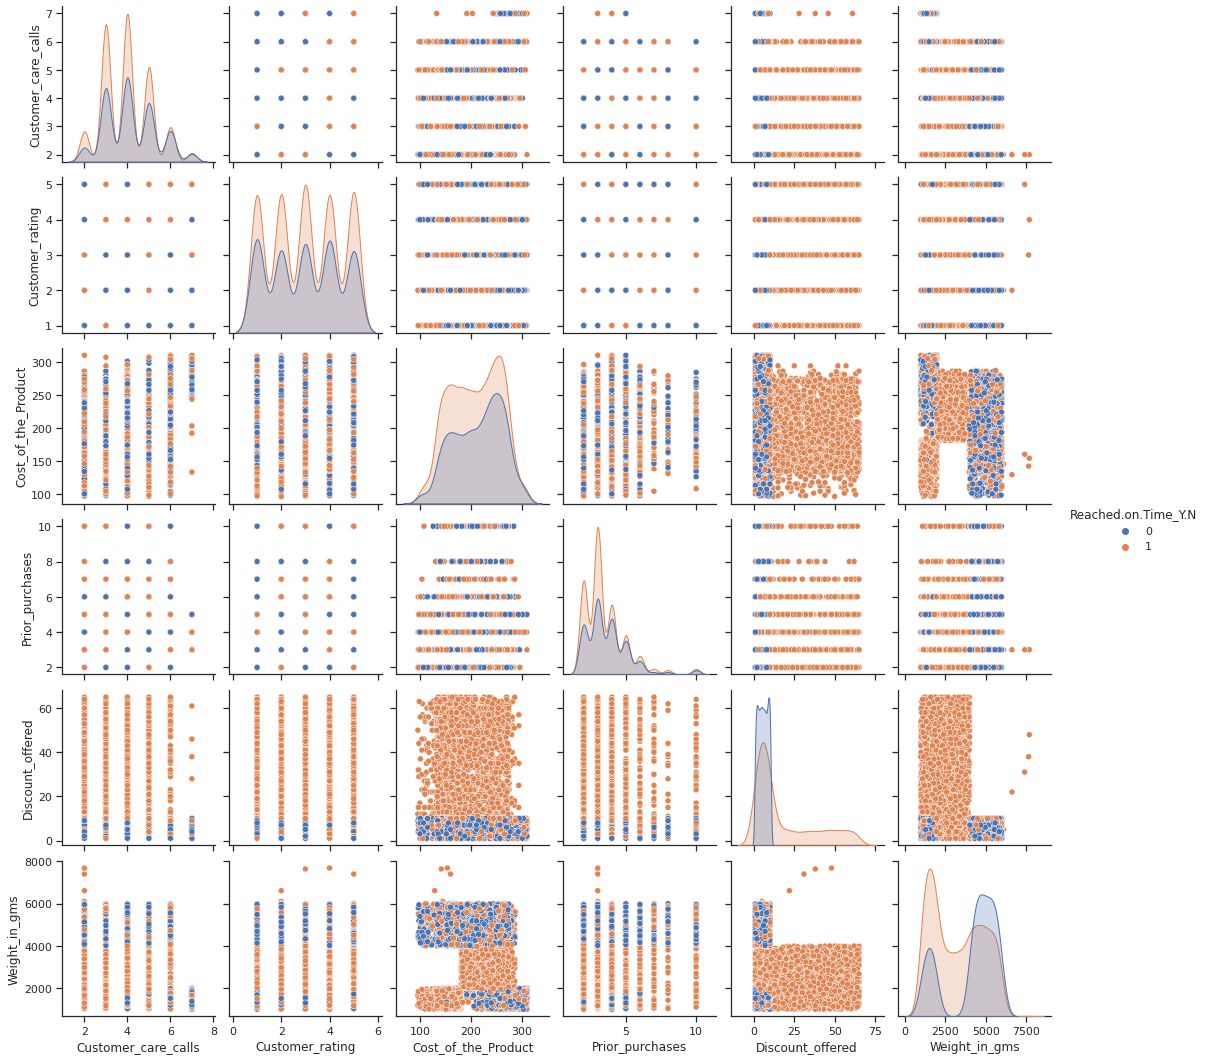

In [ ]:
# Pairplot
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Reached.on.Time_Y.N")

## **Outliers**

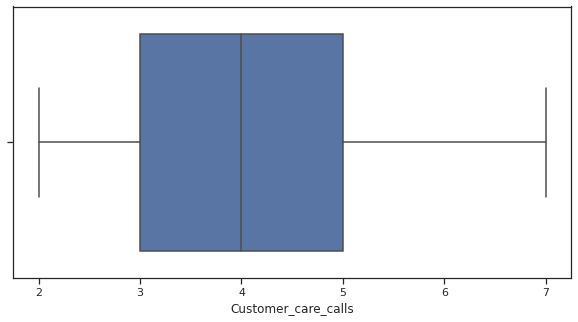

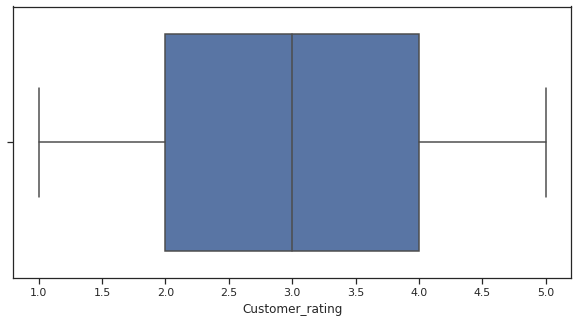

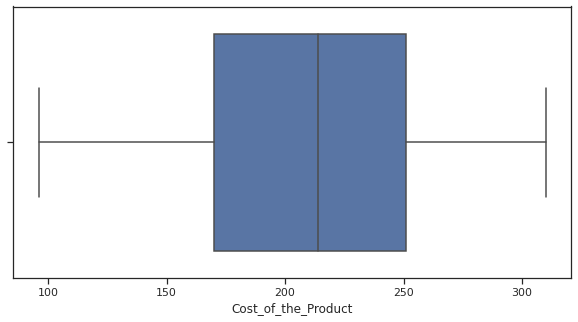

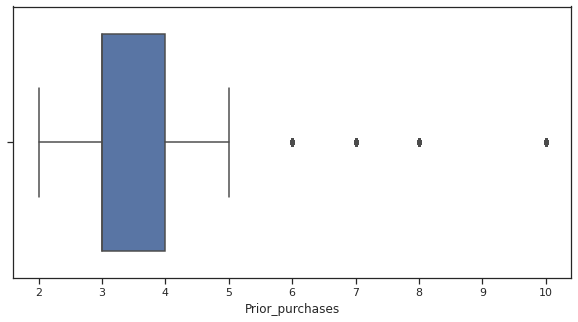

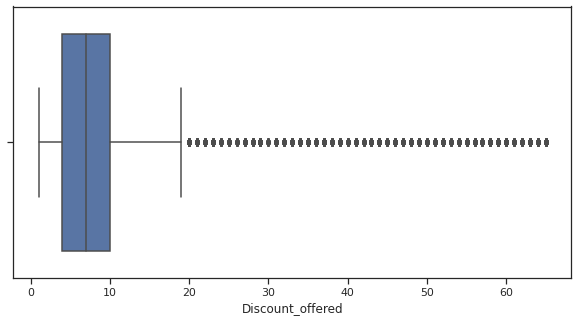

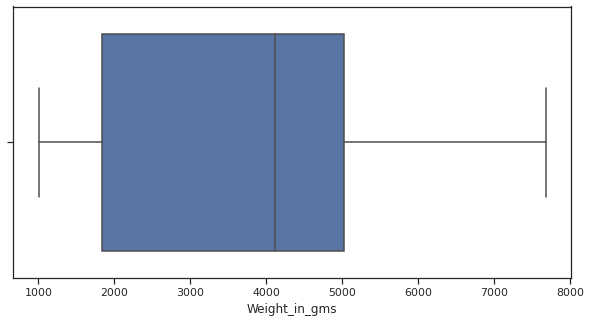

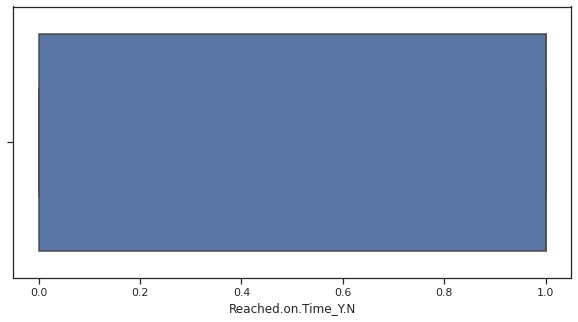

In [ ]:
# Outlier detection in quant varianbles 
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])
    plt.show()

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3-q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    print('\n')
    count_outliers(df,i)



No outliers in Customer_care_calls


No outliers in Customer_rating


No outliers in Cost_of_the_Product


There are outliers in Prior_purchases
Count of outliers are: 599


There are outliers in Discount_offered
Count of outliers are: 1314


No outliers in Weight_in_gms


No outliers in Reached.on.Time_Y.N


# **Data Preprocessing**

## **Split Data**

In [ ]:
X1 = df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]
X2 = df.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender','Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

## **Skewness Correction**

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Customer_care_calls' . Skewness = 0.39


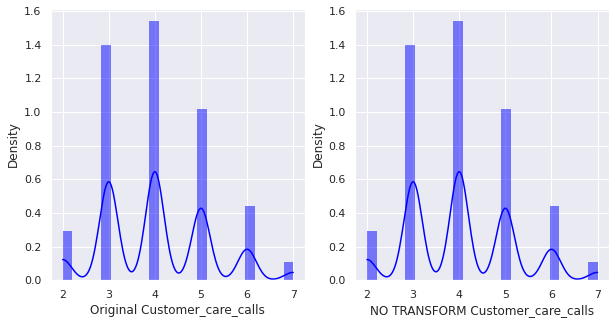


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Customer_rating' . Skewness = -0.00


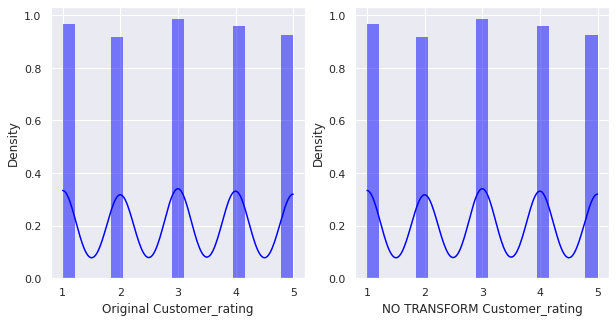


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Cost_of_the_Product' . Skewness = -0.17


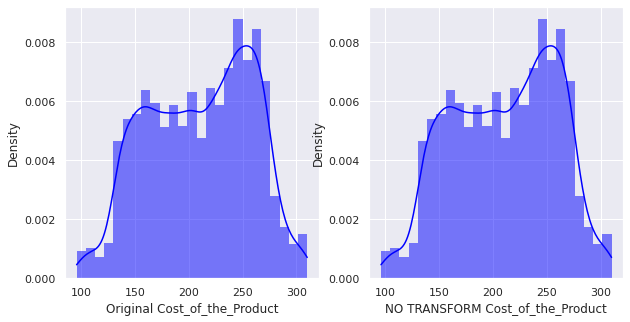


 ------------------------------------------------------

 'Prior_purchases' had 'positive' skewness of 1.66

 Transformation yielded skewness of 0.04


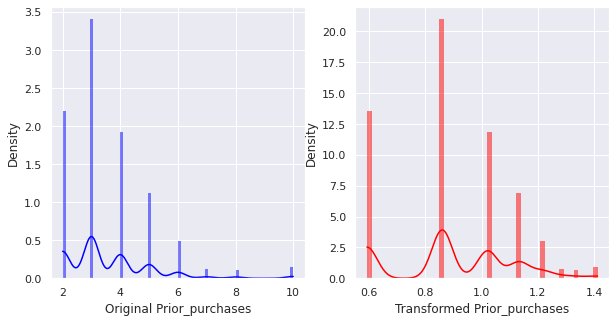


 ------------------------------------------------------

 'Discount_offered' had 'positive' skewness of 1.82

 Transformation yielded skewness of 0.01


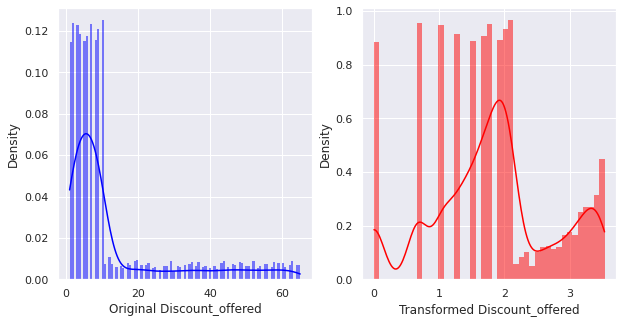


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Weight_in_gms' . Skewness = -0.22


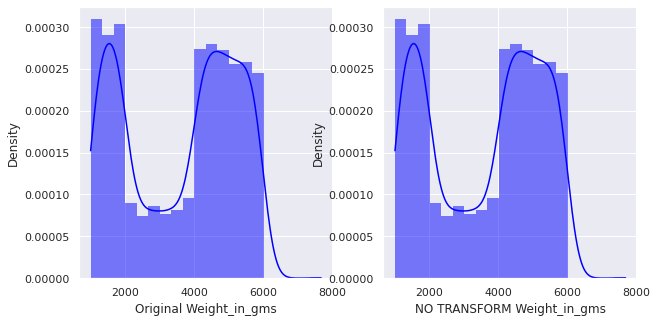

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X2 = skew_autotransform(X2.copy(deep=True), plot = True, exp = False, threshold = 1)

## **Winsorize Outliers**

Column  Customer_care_calls :  []
Column  Customer_rating :  []
Column  Cost_of_the_Product :  []
Column  Prior_purchases :  [2, 18, 20, 37, 43, 56, 69, 81, 85, 87, 96, 128, 138, 150, 160, 163, 167, 178, 187, 197, 208, 223, 226, 234, 250, 264, 271, 282, 283, 300, 304, 313, 318, 322, 332, 334, 350, 351, 364, 406, 424, 431, 457, 459, 470, 490, 500, 502, 518, 524, 539, 561, 579, 590, 617, 620, 637, 642, 651, 652, 672, 677, 678, 683, 698, 720, 727, 732, 740, 745, 746, 758, 808, 814, 825, 852, 858, 869, 876, 883, 895, 912, 913, 930, 961, 990, 1005, 1019, 1034, 1039, 1052, 1087, 1128, 1169, 1172, 1183, 1187, 1192, 1205, 1207, 1225, 1268, 1282, 1293, 1316, 1319, 1328, 1335, 1389, 1390, 1393, 1424, 1432, 1438, 1441, 1451, 1472, 1498, 1505, 1512, 1523, 1542, 1550, 1560, 1561, 1567, 1573, 1610, 1621, 1657, 1658, 1659, 1684, 1692, 1741, 1746, 1750, 1784, 1786, 1789, 1811, 1818, 1822, 1829, 1833, 1858, 1861, 1864, 1871, 1877, 1886, 1893, 1916, 1929, 1936, 1979, 1988, 1996, 2004, 2005, 2018, 2021, 

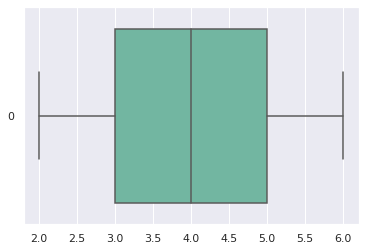

Column  Customer_rating


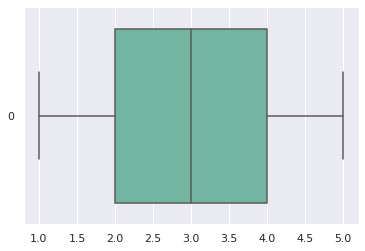

Column  Cost_of_the_Product


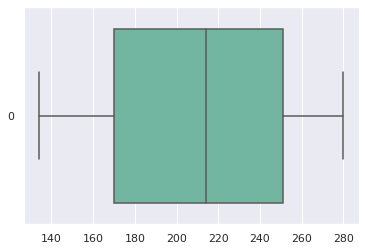

Column  Prior_purchases


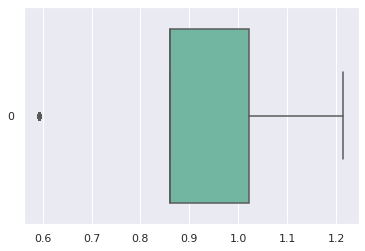

Column  Discount_offered


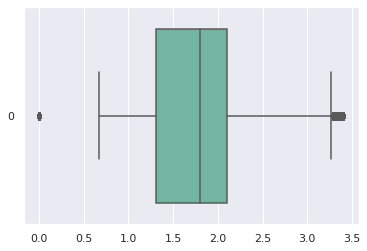

Column  Weight_in_gms


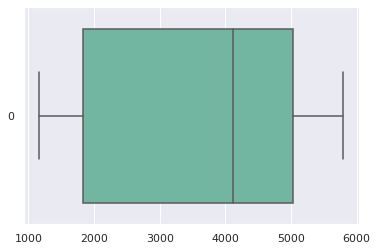

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.
cols = X2.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X2,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Descriptive Statistics Before", X2.describe())
X2_winsorized = X2.copy(deep=True)
for i in cols:
  X2_winsorized[i] = winsorize(X2[i], limits=(0.05, 0.05))
print("Descriptive Statistics After", X2_winsorized.describe())
for i in cols:
  print("Column ",i)
  ax = sns.boxplot(data=X2_winsorized[i], orient="h", palette="Set2")
  plt.show()

## **Encode Categorical Columns**

In [ ]:
# Dummy encode categorical attributes
X1 = pd.get_dummies(data=X1, drop_first=True)
X1.head()

Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   Mode_of_Shipment_Road  Mode_of_Shipment_Ship  Product_importance_low  \
0                      0                      0                       0   
1                      0                      1                       1   
2                      1                      0                       0   
3                      0                      1                       0   
4                      0                      0                       1   

   Product_importance_medium  Gender_M  
0                          0         0  
1                          0         1  
2                          0         1  
3                          1         0  
4                          0         1

In [ ]:
X=pd.concat([X1, X2_winsorized], axis=1)
X.head()

Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   Mode_of_Shipment_Road  Mode_of_Shipment_Ship  Product_importance_low  \
0                      0                      0                       0   
1                      0                      1                       1   
2                      1                      0                       0   
3                      0                      1                       0   
4                      0                      0                       1   

   Product_importance_medium  Gender_M  Customer_care_calls  Customer_rating  \
0                          0         0                    4                3   
1                          0         1                    3                1   
2                          0         1                    4                1   
3                          1         0                    4                3   
4                          0         1                    5                3   

   Cost_of_the_Product  Prior_purchases  Discount_offered  Weight_in_gms  
0                  266         1.132341          1.507736           1590  
1                  174         0.592361          3.253254           1556  
2                  154         1.214921          2.098223           5674  
3                  158         0.859865          2.887939           1207  
4                  175         0.859865          1.798568           4833

In [ ]:
X.shape

(6598, 15)

## **Scaling & Principal Components Analysis (PCA)**

In [ ]:
# Standardization z-score
stdsc = StandardScaler()  
X_std = stdsc.fit_transform(X)

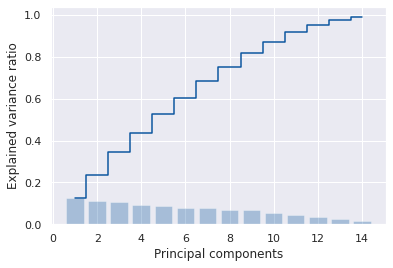

In [ ]:
# Principal Components Analysis
# Examine the explained variance ratio in order for each components
pca = PCA()
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

# Show the explained variance ratio in order for each components
plt.bar(range(1, 15), pca.explained_variance_ratio_[:14], alpha=0.3, align='center')
plt.step(range(1, 15), np.cumsum(pca.explained_variance_ratio_[:14]), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## **Recursive Feature Elimination (RFE)**

In [ ]:
X_std=pd.DataFrame(X_std)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6)
_ = rfe.fit(X_std,y)
print('Important Features\n',X_std.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X_std), y)
print("\n Accuracy: ",rf.score(rfe.transform(X_std), y))

Important Features
 Int64Index([9, 10, 11, 12, 13, 14], dtype='int64')

 Accuracy:  0.9993937556835405


## **Feature Importance Analysis**

<BarContainer object of 15 artists>

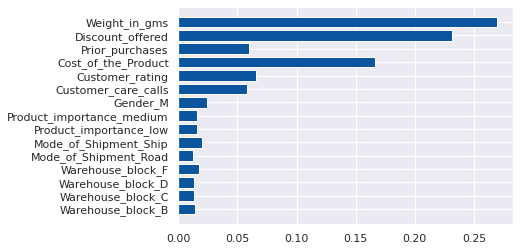

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_std, y)
plt.barh(X.columns, rf.feature_importances_)

# **Classification Model Selection**

## **Comparing Classifiers**

In [ ]:
# Work with the set of predictors identified by RFE
best_predictors = rfe.support_              # identifies features used
new_features = []                           # X with selected features
for feature, predictor in list(zip(X, best_predictors)):
    if predictor == True:
        new_features.append(feature)

X = df[new_features]
X.shape

(6598, 6)

In [ ]:
# Workflow standardizes, SMOTEs training set, fits a classifier, and reports metrics.
# SMOTE evidently doesn't have a 'fit_transform' method, so there's no way to incorporate it into an sklearn pipeline
# We'll consider an alternative - an imblearn pipeline in the gridsearch section

names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "Naive Bayes", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]
classifiers = [
    Perceptron(random_state=1),    
    LogisticRegression(),   
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data 
no_folds = 5 # number of folds desired for cross validation
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)
for name, clf in zip(names, classifiers):
  print('CLASSIFIER: ',name,'\n')
  mean_accuracy = 0.0
  mean_balanced_accuracy = 0.0
  mean_auc = 0.0
  for fold, (train_index, test_index) in enumerate(kf.split(X,y),1):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)] 
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
    stdsc = StandardScaler()  
    X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)   
    X_test_std = stdsc.transform(X_test)   
    clf.fit(X_train_SMOTE_std, y_train_SMOTE) 
    y_pred = clf.predict(X_test_std)
    print(f'For fold {fold}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}') # clf.score(X_test_std, y_test)
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    mean_accuracy = mean_accuracy + clf.score(X_test_std, y_test)
    mean_balanced_accuracy = mean_balanced_accuracy + balanced_accuracy_score(y_test, y_pred)
    mean_auc = mean_auc + roc_auc_score(y_test, y_pred)
  mean_accuracy = mean_accuracy / no_folds
  mean_balanced_accuracy = mean_balanced_accuracy / no_folds
  mean_auc = mean_auc / no_folds
  print('Average accuracy: %.3f Average balanced accuracy: %.3f Average AUC: %.3f\n\n' % (mean_accuracy, mean_balanced_accuracy, mean_auc))

CLASSIFIER:  Perceptron 

For fold 1:
Accuracy: 0.5568181818181818
Balanced Accuracy: 0.5644526081659995
AUC: 0.5644526081659995
For fold 2:
Accuracy: 0.5818181818181818
Balanced Accuracy: 0.5813518567993587
AUC: 0.5813518567993587
For fold 3:
Accuracy: 0.5931818181818181
Balanced Accuracy: 0.5786563489943133
AUC: 0.5786563489943133
For fold 4:
Accuracy: 0.624715693707354
Balanced Accuracy: 0.6529303723094266
AUC: 0.6529303723094267
For fold 5:
Accuracy: 0.6209249431387415
Balanced Accuracy: 0.6567578412358723
AUC: 0.6567578412358723
Average accuracy: 0.595 Average balanced accuracy: 0.607 Average AUC: 0.607


CLASSIFIER:  Logistic Regression 

For fold 1:
Accuracy: 0.6242424242424243
Balanced Accuracy: 0.6582362070321905
AUC: 0.6582362070321905
For fold 2:
Accuracy: 0.6446969696969697
Balanced Accuracy: 0.6740153047593603
AUC: 0.6740153047593604
For fold 3:
Accuracy: 0.6553030303030303
Balanced Accuracy: 0.6819825579176367
AUC: 0.6819825579176367
For fold 4:
Accuracy: 0.66034874905231

The leaderboard is now as follows:
Classifier performance results are ordered by AUC.

|**Classifier** |    AUC    |       Accuracy      |
|:----------------------|:------------:|:--------------:|
|Random Forest | 0.733 | 0.689 |
|XGBoost | 0.729 | 0.688 |
|Decisiom Tree | 0.727 | 0.685 |
|Support Vector Machine | 0.722 | 0.673 |
|MLP | 0.721 | 0.678 |
|Naive Bayes | 0.703 | 0.647 |
|LightGBM | 0.694 |  0.675 |
|Logistic Regression | 0.677 | 0.649 |
|kNN | 0.656 | 0.649 |
|Perceptron | 0.607 | 0.595 |

We pick the Random Forest Model to proceed


# **GridSearch for RandomForest Classifier**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# There are likely a number of classifiers in the Rashomon Set
# We'll pick the random forest model and optimiz the hyperparameters

RF_params = {'n_estimators':range(10, 200, 20),'criterion':['gini','entropy'],'max_depth':[5,10,15,20,25],'class_weight':[{0:0.4, 1:0.6}, {0:0.5, 1:0.5}, {0:0.6, 1:0.4}]}
clf = GridSearchCV(RandomForestClassifier(oob_score=True), RF_params, cv=3,scoring='roc_auc')
clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE))
y_pred = clf.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(clf.best_params_, clf.best_score_)
print("AUC = ",roc_auc_score(y_test, y_pred) )
print("Accuracy = ",accuracy_score(y_test, y_pred))

[[432 100]
 [303 484]]
{'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'gini', 'max_depth': 25, 'n_estimators': 150} 0.7879354497354497
AUC =  0.7135118609739087
Accuracy =  0.6944655041698257


The AUC is 71.35% and the accuracy is only 69.45% after optimizing the hyperparameters, which is not very good

In [ ]:
# Review propensities and misclassifications from PCA solution
clf = RandomForestClassifier(oob_score=True,class_weight= {0: 0.6, 1: 0.4}, criterion='gini',max_depth=20, n_estimators=170)
clf_propensities = pd.DataFrame(clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE)).predict_proba(X_test_std)) 

# Create a dataframe showing actuals, predicted, and propensities 
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, clf_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(clf_propensities[1])):
  if((clf_propensities.loc[i,1] >= lower_limit) & (clf_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(clf_propensities[1])))

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies

Percentage of test instances with propensity in [0.30, 0.70]: 44.96
Instances for which actual and predicted differ:


Actual  Predicted  Propensity
3          1          0    0.405280
4          1          0    0.245232
6          1          0    0.188997
9          1          0    0.566389
11         1          0    0.255906
...      ...        ...         ...
1310       1          0    0.513964
1312       0          1    0.566693
1314       1          0    0.074768
1316       1          0    0.342789
1318       0          1    0.500205

[403 rows x 3 columns]

# **Auto-ML**

## **Auto-Sklearn**

In [ ]:
# Create Auto-Sklearn model and report performance
# regr = AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=-1,ensemble_size=1, initial_configurations_via_metalearning=0)  #Use this instance if you want to suppress the ensemble 
clf_auto = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=-1,metric = autosklearn.metrics.roc_auc)
clf_auto.fit(X_train_SMOTE_std, y_train_SMOTE)
# summarize
print(clf_auto.sprint_statistics())
# evaluate best model
y_pred = clf_auto.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

auto-sklearn results:
  Dataset name: 4c738dee-a616-11ec-9417-0242ac1c0002
  Metric: roc_auc
  Best validation score: 0.800687
  Number of target algorithm runs: 41
  Number of successful target algorithm runs: 38
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0

[[452  80]
 [325 462]]
AUC: 0.7183317251196607
Accuracy: 0.6929492039423806


In [ ]:
# Show the Auto-Sklearn leaderboard and final model
print(clf_auto.leaderboard()) # Leaderboard
print(clf_auto.show_models())  # Final model

          rank  ensemble_weight               type      cost  duration
model_id                                                              
26           1             0.10      random_forest  0.199313  7.003133
2            2             0.08      random_forest  0.199804  6.807065
8            3             0.18        extra_trees  0.203572  5.990951
24           4             0.08  gradient_boosting  0.213974  6.085298
30           5             0.06  gradient_boosting  0.216182  4.000762
28           6             0.02        extra_trees  0.305734  6.546726
42           7             0.32                lda  0.310905  1.654449
35           8             0.16       bernoulli_nb  0.485879  1.850235
{26: {'model_id': 26, 'rank': 1, 'cost': 0.19931331901976757, 'ensemble_weight': 0.1, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2306dbdc50>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocess

## **TPOT**

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 4.5 MB/s 
     |████████████████████████████████| 173.6 MB 8.8 kB/s 
     |████████████████████████████████| 160 kB 70.0 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=f6d1c1f2b0e0396d9478ef36f4a9c02eb19561ee81220321a21e603131777d26
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# Tree-based pipeline from TPOT: credits: http://automl.info/tpot/
# import the AutoMLpackage after installing tpot.
import tpot
# import other necessary packages.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTClassifier

In [ ]:
# Let TPOT build a model!
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
clf_tpot = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='roc_auc', verbosity=3, random_state=1, n_jobs=-1)
clf_tpot.fit(X_train_SMOTE_std, y_train_SMOTE)
# evaluate best model
y_pred = clf_tpot.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 78.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7928348335366298	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.9000000000000001, ExtraTreesClassifier

In [ ]:
# Show the final model
clf_tpot.fitted_pipeline_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_features=0.8, min_samples_split=15,
                                        random_state=1))])

# **XAI**

## **Feature Importance - Random Forest Feature Importance [Global Method]**
Some code adapted from here: https://www.kaggle.com/paultimothymooney/feature-selection-with-permutation-importance

In [ ]:
Xcols = X.columns
stdsc = StandardScaler()  
X_std = pd.DataFrame(stdsc.fit_transform(X))

In [ ]:
y_pred = clf.predict(X_std)
y_pred = pd.DataFrame(y_pred)

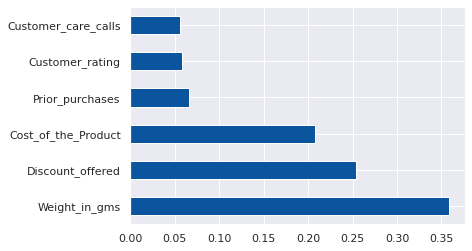

In [ ]:
# Fit Random Forest model, recover featire importances
clf.fit(X_std,np.ravel(y))
feature_importances = pd.Series(clf.feature_importances_, index=Xcols)
feature_importances.nlargest(10).plot(kind='barh')

## **SHAP values [Global & Local Method]**

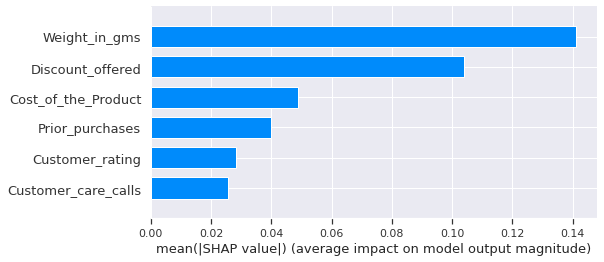

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_std)
shap.summary_plot(shap_values[1], X_std, plot_type='bar',feature_names=Xcols)

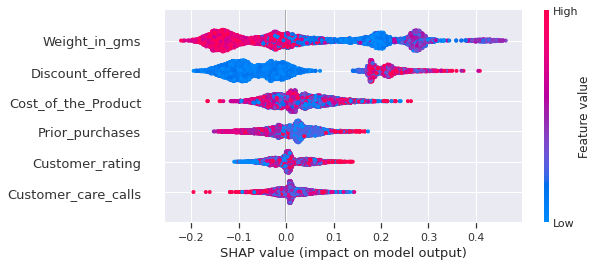

In [ ]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values[1], X_std,feature_names=Xcols)

We can see that weight and discount affects the outcome the most. Heavier packages would lead to the prediction of arriving on time, and with large value of discount offered, the predicted outcomes are generally not on time. 

## **KDE Plots [Global Method]**

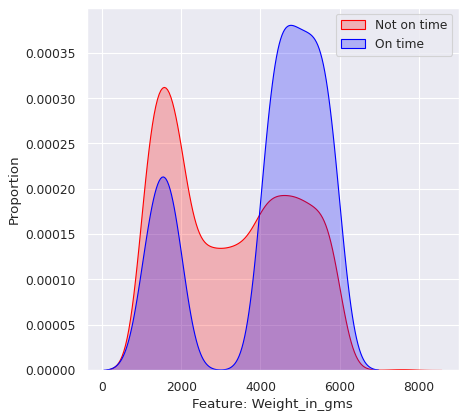

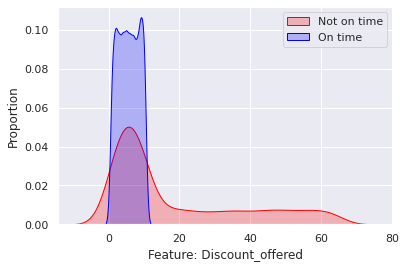

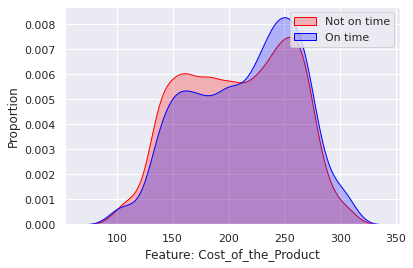

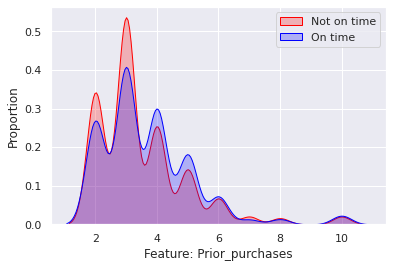

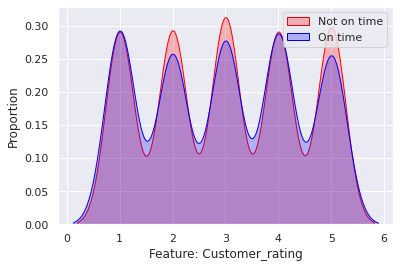

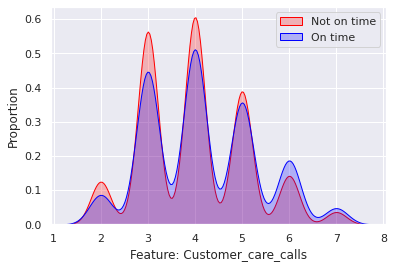

In [ ]:
# Generate kde plots to examine the density functions of the most important features
# Note: the kde plots present X, before SMOTE and standardzizaton, as that is what a domain expert will best be able to consume.
# Note: there is an implementation problem in the code below: I should be using the predicted values for the target, rather than the actual values.
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
for i in ['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product', 'Prior_purchases', 'Customer_rating', 'Customer_care_calls']:
    sns.kdeplot(df.loc[(df['Reached.on.Time_Y.N']==1),i], color='red', shade=True, Label='Not on time')
    sns.kdeplot(df.loc[(df['Reached.on.Time_Y.N']==0),i], color='blue', shade=True, Label='On time')
    plt.xlabel('Feature: '+str(i))
    plt.ylabel('Proportion')   
    plt.legend(loc='upper right')
    plt.show()
    

## **Partial Dependence Plots [Global Method]**

[WARNING] [2022-03-17 19:02:14,224:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
[WARNING] [2022-03-17 19:02:14,234:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
[WARNING] [2022-03-17 19:02:14,247:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
[WARNING] [2022-03-17 19:02:14,265:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


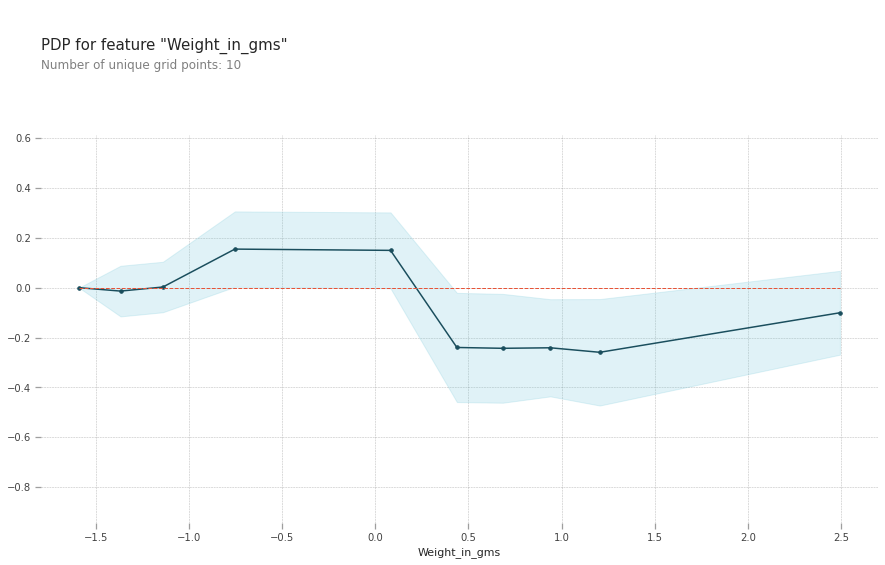

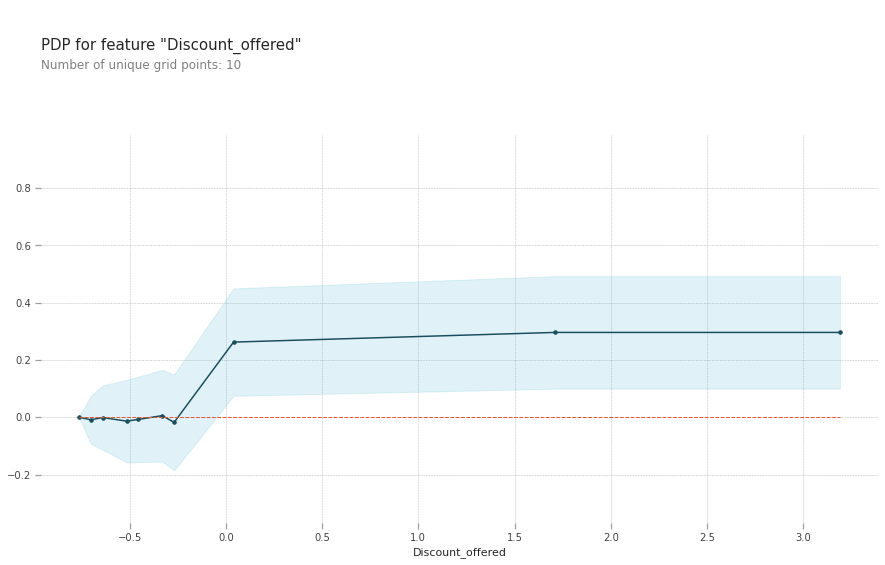

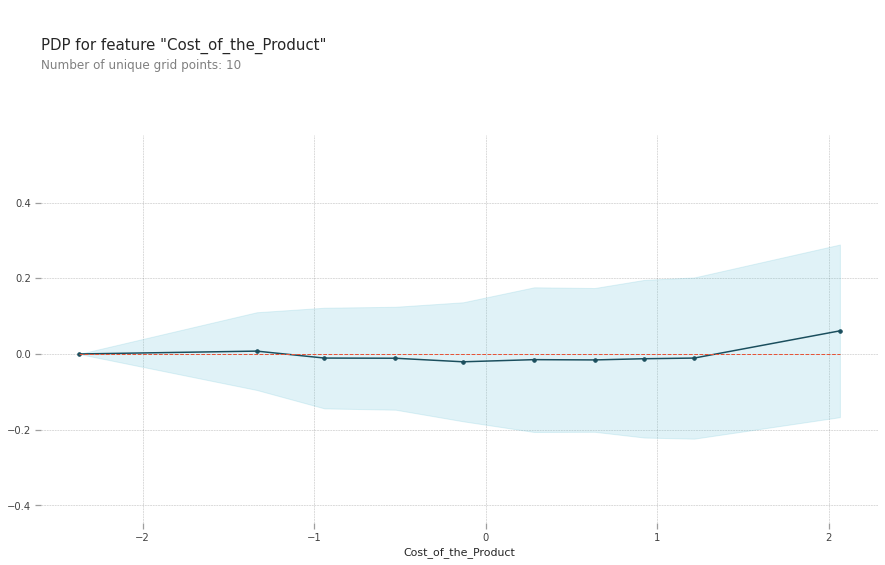

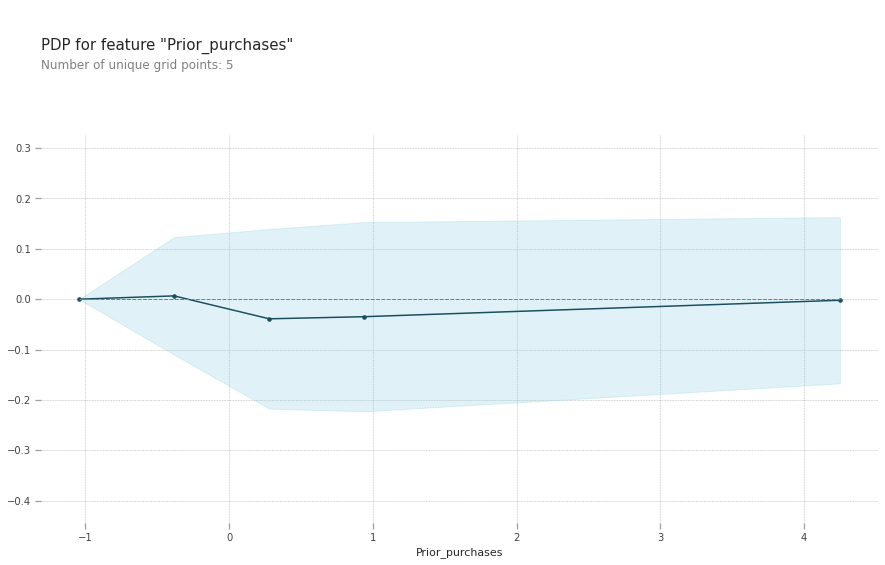

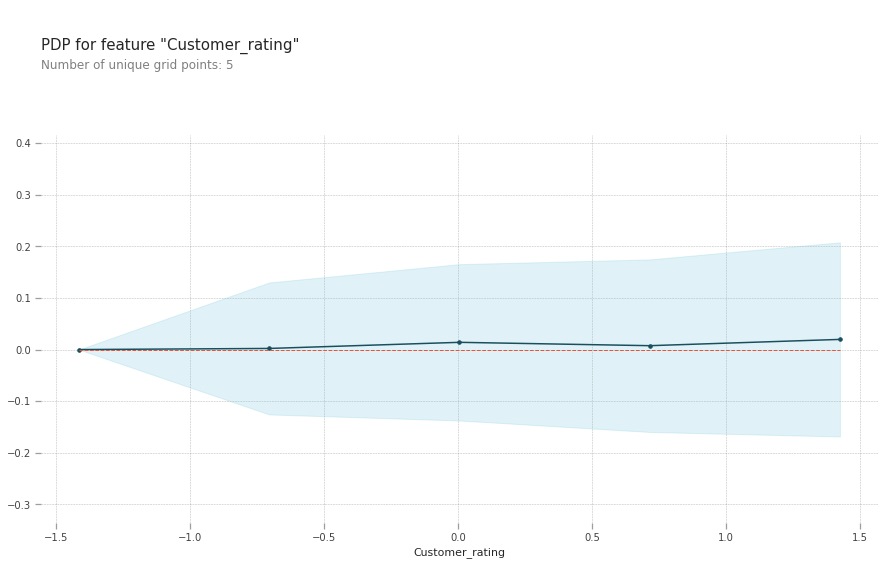

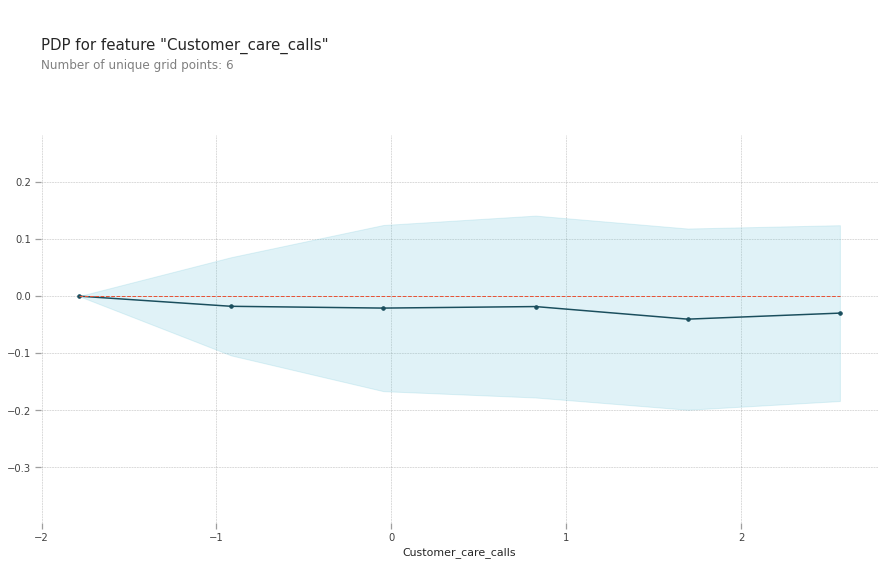

In [ ]:
X_std.columns = Xcols
for i in ['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product', 'Prior_purchases', 'Customer_rating', 'Customer_care_calls']:    
    pdp_ = pdp.pdp_isolate(model = clf, dataset = X_std, model_features=Xcols, feature = i)
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

Computing partial dependence and ICE plots...


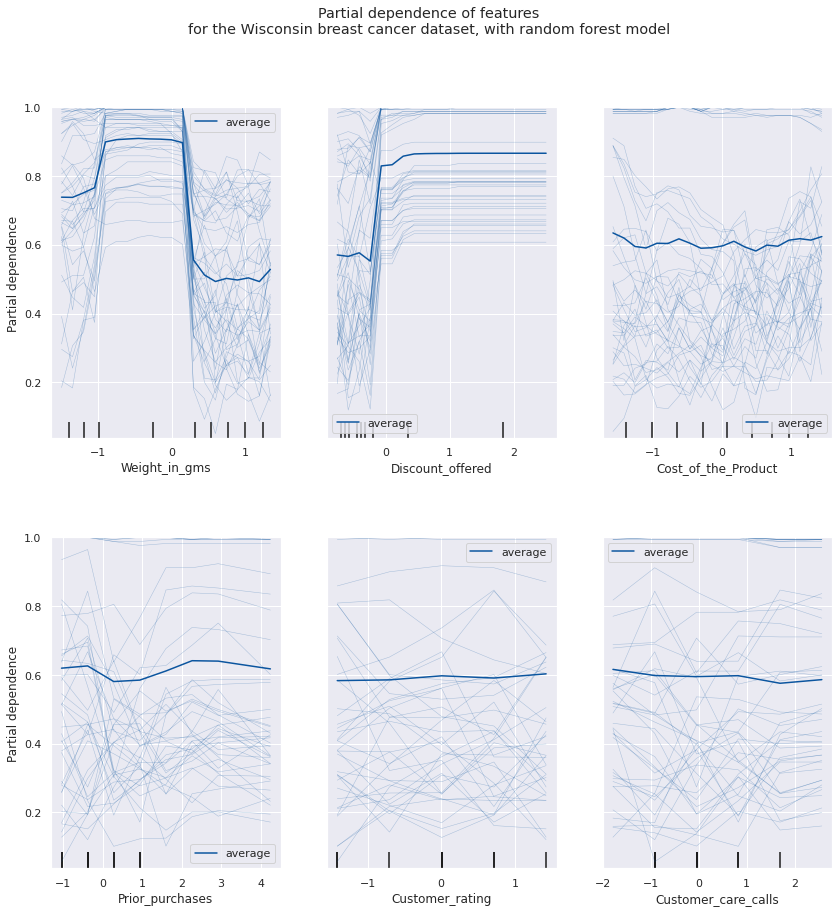

In [ ]:
from sklearn.inspection import plot_partial_dependence
# Creare PDP & ICE plots
print("Computing partial dependence and ICE plots...")
features = ['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product', 'Prior_purchases', 'Customer_rating', 'Customer_care_calls']
fig, ax = plt.subplots(figsize=(14, 14))
display =  plot_partial_dependence(
    clf,
    X_std,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    # line_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    # pd_line_kw={"color": "tab:orange", "linestyle": "--"}, 
    ax=ax
)
display.figure_.suptitle(
    "Partial dependence of features\n"
    "for the Wisconsin breast cancer dataset, with random forest model"
)
display.figure_.subplots_adjust(hspace=0.3)

## **LIME [Local Method]**

In [ ]:
# Preparation for LIME
predict_fn_rf = lambda x: clf.predict_proba(x).astype(float)

# Create a LIME Explainer
X = X_std.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,
  feature_names = X_std.columns, 
  class_names = ['Not On time','On time'],
  kernel_width = 5)

feature_names = X_std.columns
# Choose the data point to be explained
chosen_index = X_std.index[10]         # Change 10 to indicate which row you want explained
chosen_instance = X_std.loc[chosen_index].values
ci = pd.DataFrame([chosen_instance], columns = feature_names)
print('Chosen Instance to be explained:',ci,'has actual target value',y.loc[chosen_index], 'and predicted value ',y_pred.loc[chosen_index]) 

# Use the LIME explainer to explain the data point
exp = explainer.explain_instance(
  chosen_instance, 
  predict_fn_rf, 
  num_features = 10)
exp.show_in_notebook(show_all=False)

Chosen Instance to be explained:    Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0            -0.915436        -0.703334             0.323428        -0.382292   

   Discount_offered  Weight_in_gms  
0         -0.639662       0.816722   has actual target value 1 and predicted value  0    1
Name: 10, dtype: int64


## **Surrogate Decision Tree Model**

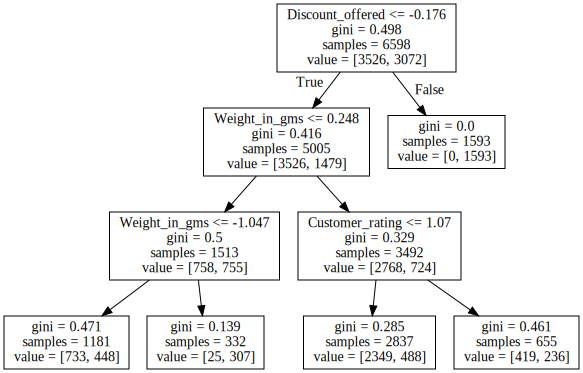

In [ ]:
# Decision Tree for Random Forest model
from sklearn import tree
import graphviz

proxy = DecisionTreeClassifier(random_state = 20850,max_depth=3)    # Control the depth of the proxy tree here
proxy.fit(X_std,y_pred)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
graphviz.Source(tree_graph)

In [ ]:
# How good is this surrogate decision tree model? Let's find out...
y_proxy = proxy.predict(X_std) # Use the decision tree to make predictions
y_proxy = pd.DataFrame(y_proxy)
print('Correlation coefficient of RF predictions and Surrogate Model predictions: ',y_pred.corrwith(y_proxy,axis=0))

Correlation coefficient of RF predictions and Surrogate Model predictions:  0    0.670909
dtype: float64


# **Leaderboard**

Top classifiers ranked by AUC:

|**Classifier** |    AUC    |       Accuracy      | Confusion Matrix |
|:----------------------|:------------:|:--------------:|:--------------:|
|Auto-Sklearn  | 0.718 | 0.693 | $$\begin{bmatrix} 452 & 80 \\ 325 & 462\\\end{bmatrix}$$ |
|Random Forest | 0.714 | 0.694 | $$\begin{bmatrix} 432 & 100 \\ 303 & 484\\\end{bmatrix}$$ |
|TPOT | 0.691 | 0.682 | $$\begin{bmatrix} 394 & 138 \\ 282 & 505\\\end{bmatrix}$$ |